# Projet Data Science - Livrable 1

## 1. Importation des bibliothèques

Avant toute chose, il est nécessaire d'importer les différentes bibliothèques qui seront utilisées par le programme.

In [1]:
import scipy
from scipy import ndimage
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2 as cv
import os

## 2. Importation des fichiers

Première étape commune aux deux opérations que sont l'affûtage et le débruitage, le chargement des fichiers s'opère au début de l'algorithme en utilisant la bibliothèque imageio.

In [2]:
noisy_path = "datasets/Noisy/"
blurry_path = "datasets/Blurry/"

noisy_images = []
blurry_images = []
    
# Noisy images
for image_num in range(1, len(os.listdir(noisy_path)) + 1):
    noisy_images.append(imageio.imread(noisy_path + "noisy_{}.jpg".format(f'{image_num:03}')))

# Blurry images
for image_num in range(1, len(os.listdir(blurry_path)) + 1):
    blurry_images.append(imageio.imread(blurry_path + "blurry_{}.jpg".format(f'{image_num:03}')))

Ce code permet ensuite d'utiliser n'importe quelle image des deux datasets en utilisant `noisy_images[X]` ou`blurry_images[X]` , avec X le numéro de la photo moins un.

## 3. Débruitage

## 4. Affûtage

Afin d'obtenir le meilleur résultat possible, plusieurs méthodes ont été testées, et deux ont notamment été retenues : l'une en utilisant un Unsharp Mask et l'autre en utilisant un filtre Laplacien.

### Méthode avec Unsharp Mask

La méthode de l'Unsharp Mask consiste à flouter l'image source puis à lui soustraire cette image floutée afin de produire un masque de contours, qui est ensuite ajouté à l'image source tout en étant pondéré par un facteur appelé alpha.

In [54]:
def unsharp_mask(image, mask, alpha):
    return np.clip(image + alpha * mask, 0, 1)
    
results_blurry_images_unsharp = []

for im in blurry_images:
    im = im / 255
    im_blurred = ndimage.gaussian_filter(im, (5,5,0))
    im_mask = np.clip(im - im_blurred, 0, 1)
    im_sharp = unsharp_mask(im, im_mask, 0.5)
    results_blurry_images_unsharp.append(im_sharp)

Regardons de plus près les différentes images produites au fil de l'exécution du code. Le prochain bloc de code affiche 4 images, correspondant respectivement à l'image d'origine, à l'image floutée, au masque obtenu, et au résultat.

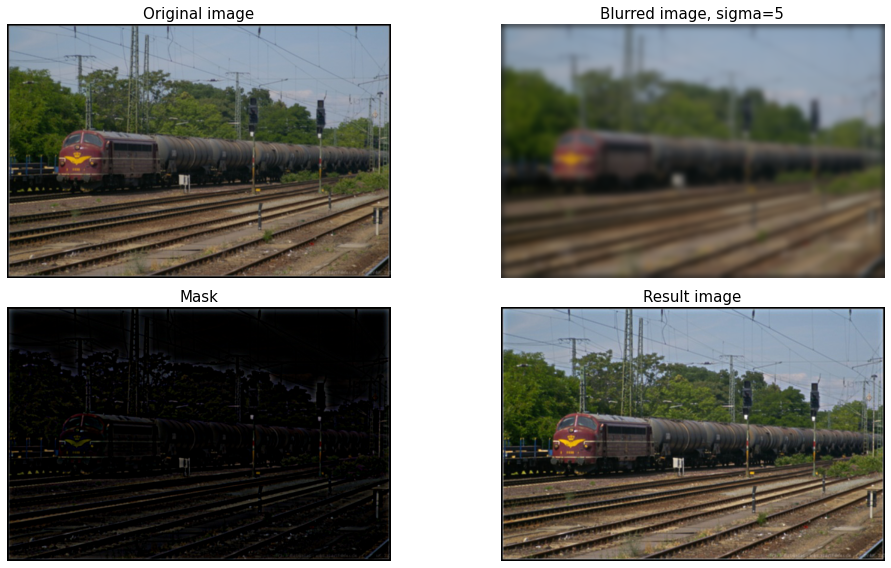

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15, 8))
axes = axes.ravel()
axes[0].imshow(im)
axes[0].set_title('Original image', size=15)
axes[1].imshow(im_blurred)
axes[1].set_title('Blurred image, sigma=5', size=15)
axes[2].imshow(im_mask)
axes[2].set_title('Mask', size=15)
axes[3].imshow(im_sharp)
axes[3].set_title('Result image', size=15)
for ax in axes:
    ax.axis('off')
fig.tight_layout()
plt.show()

Le bloc de code suivant permet de comparer l'image de base et le résultat de l'unsharp mask, en renseignant simplement le numéro de l'image en question (depuis 0).

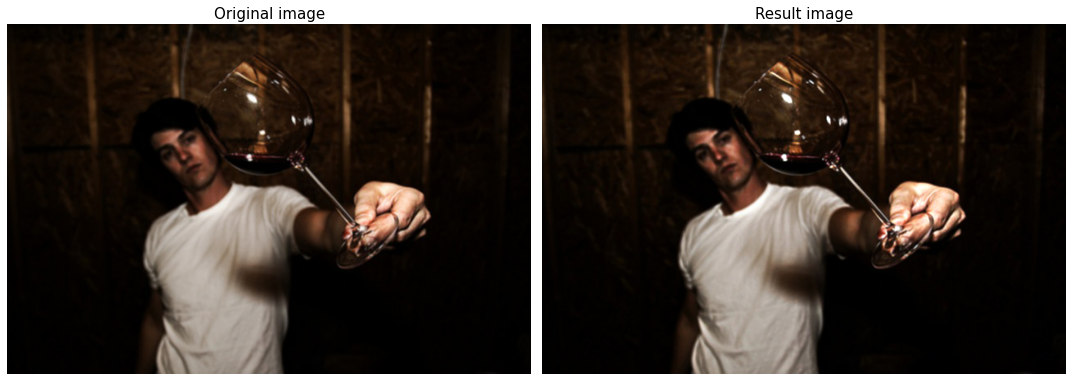

In [55]:
im_num = 40

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 8))
axes = axes.ravel()
axes[0].imshow(blurry_images[im_num])
axes[0].set_title('Original image', size=15)
axes[1].imshow(results_blurry_images_unsharp[im_num])
axes[1].set_title('Result image', size=15)
for ax in axes:
    ax.axis('off')
fig.tight_layout()
plt.show()

### Méthode avec filtre Laplacien

Cette méthode fait appel à l'utilisation d'un filtre de convolution Laplacien sur l'image. Le noyau utilisé n'est pas le plus "elevé", afin d'éviter des contours trop marqués sur l'image en sortie.

In [56]:
img = imageio.imread('datasets/Blurry/blurry_001.jpg')

results_blurry_images = []

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for im in blurry_images:
    results_blurry_images.append(
        cv.filter2D(im, -1, kernel)
    )

Le bloc de code suivant permet de comparer l'image de base et le résultat du filtre laplacien, en renseignant simplement le numéro de l'image en question (depuis 0).

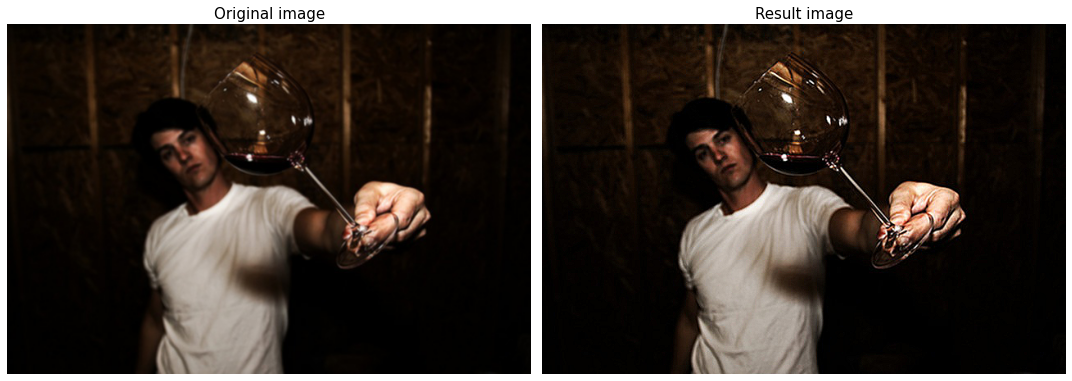

In [52]:
im_num = 40

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 8))
axes = axes.ravel()
axes[0].imshow(blurry_images[im_num])
axes[0].set_title('Original image', size=15)
axes[1].imshow(results_blurry_images[im_num])
axes[1].set_title('Result image', size=15)
for ax in axes:
    ax.axis('off')
fig.tight_layout()
plt.show()

## 5. Etude de cas

### Résultats du débruitage

### Résultats de l'affûtage

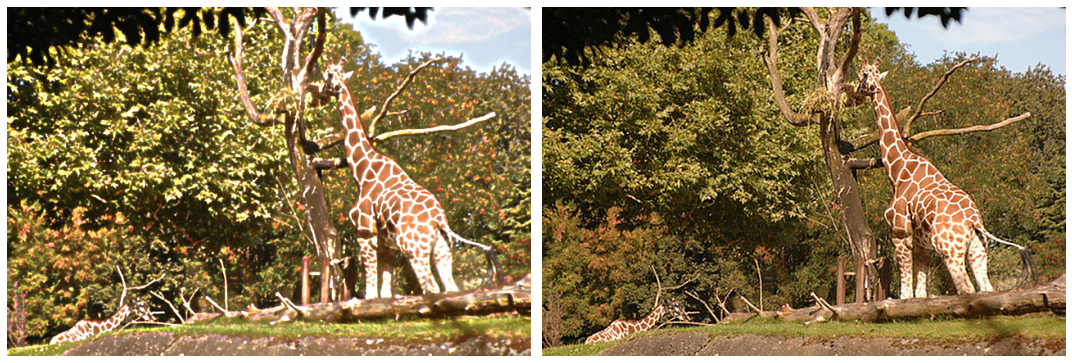

In [5]:
# Comparaison entre les deux méthodes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 15))
axes = axes.ravel()
axes[0].imshow(im_sharp)
axes[1].imshow(dst)
for ax in axes:
    ax.axis('off')
fig.tight_layout()
plt.show()